In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/email-spam-detection-dataset-classification/spam.csv


In [2]:
df = pd.read_csv("../input/email-spam-detection-dataset-classification/spam.csv", 
                 encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename(columns = {'v1': 'label', 'v2': 'text'},inplace =True)
df.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


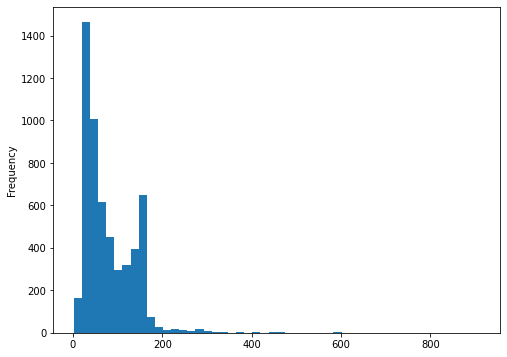

In [10]:
df['length'].plot(kind = 'hist', figsize=(8,6),bins = 50)
plt.show()

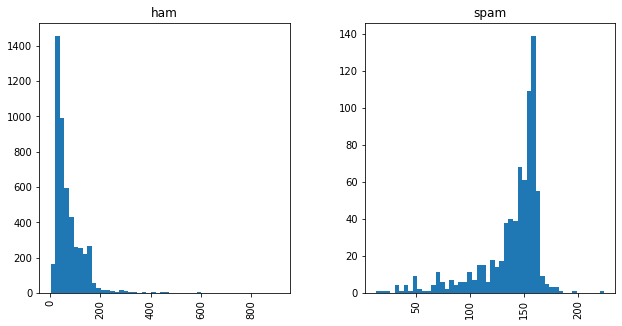

In [11]:
df.hist(column = 'length', by = 'label', bins= 50, figsize=(10,5))
plt.show()

In [12]:
df.loc[:,'label'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


> Implementing Bag of Words:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['text'])

In [14]:
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

> Splitting into train, test dataset:

In [15]:
x_train,x_test,y_train,y_test = train_test_split(text, df['label'], test_size=0.2, random_state=1)

In [16]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


> Using mlpclassifier to build our model for spam classification:

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [18]:
y_pred = mlp.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

> Let's check our models performance:

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9928251121076234


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       976
           1       1.00      0.94      0.97       139

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



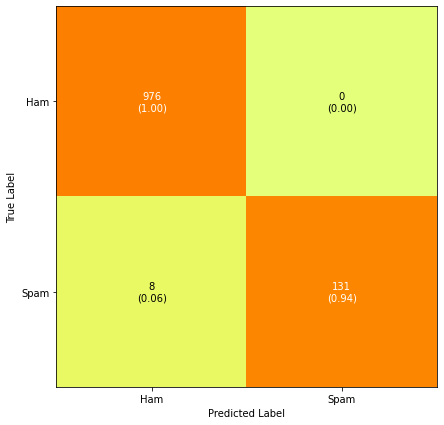

In [21]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Ham','Spam'],
                     show_normed=True,cmap = 'Wistia');#Wistia
plt.xticks(rotation=0,alpha = 1.0,color = 'black')
plt.yticks(alpha = 1.0,color = 'black')
plt.xlabel("Predicted Label",color="black")
plt.ylabel("True Label",color="black")
plt.show()